#### Download the dataset from Kaggle using the custiom downloader library that can be obtained from the libraries repository.

In [2]:
import sys
sys.path.append(r"C:\Users\Utkarsh\Python\libraries")

import importlib
import dataset_downloader
importlib.reload(dataset_downloader)

from dataset_downloader import download_kaggle_dataset as downloader

downloader("electricity_load_forecasting")

Loading the data into a dataframe.

Peeking at the data to understand its structure and types.

In [8]:
# Convert datetime column
continuous_df['datetime'] = pd.to_datetime(continuous_df['datetime'])
weekly_df['datetime'] = pd.to_datetime(weekly_df['datetime'])

# Set datetime as index (optional for time-series)
continuous_df.set_index('datetime', inplace=True)
weekly_df.set_index('datetime', inplace=True)

# Print sheet names for Excel files
print("Train sheets:", list(train_df.keys()))
print("Test sheets:", list(test_df.keys()))

# Peek at the data
print("Continuous dataset:")
print(continuous_df.head(25), continuous_df.dtypes)

print("Weekly pre-dispatch forecast:")
print(weekly_df.head(25), weekly_df.dtypes)

Train sheets: ['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
Test sheets: ['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']
Continuous dataset:
                     nat_demand    T2M_toc  QV2M_toc       TQL_toc    W2M_toc  \
datetime                                                                        
2015-01-03 01:00:00    970.3450  25.865259  0.018576  1.617432e-02  21.850546   
2015-01-03 02:00:00    912.1755  25.899255  0.018653  1.641846e-02  22.166944   
2015-01-03 03:00:00    900.2688  25.937

Initial exploration of the data


In [10]:
# Missing values?
print("Missing values per column:")
print(continuous_df.isnull().sum())

# Summary statistics
print("\nSummary stats:")
print(continuous_df.describe())




Missing values per column:
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

Summary stats:
         nat_demand       T2M_toc      QV2M_toc       TQL_toc       W2M_toc  \
count  48048.000000  48048.000000  48048.000000  48048.000000  48048.000000   
mean    1182.868647     27.399111      0.018313      0.079979     13.391049   
std      192.068896      1.675462      0.001607      0.065589      7.295502   
min       85.192500     22.953455      0.012054      0.000000      0.008979   
25%     1020.056900     26.160455      0.017236      0.026451      7.544958   
50%     1168.427700     27.118051      0.018590      0.065201     12.182103   
75%     1327.563950     28.558344      0.019521      0.117310     18.661282   
max     1754.882000     35.039575      0.022690      0.5

<Axes: title={'center': 'National Demand Distribution'}, ylabel='Frequency'>

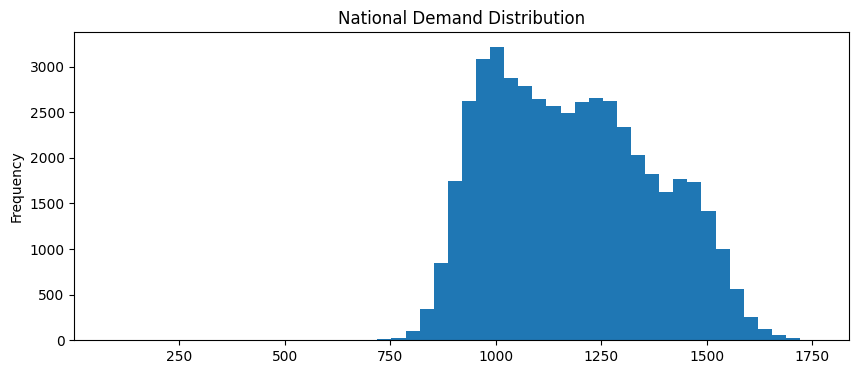

In [12]:
# Demand distribution
continuous_df['nat_demand'].plot(kind='hist', bins=50, figsize=(10, 4), title="National Demand Distribution")

<Axes: title={'center': 'Hourly Demand Over Time'}, xlabel='datetime', ylabel='Frequency'>

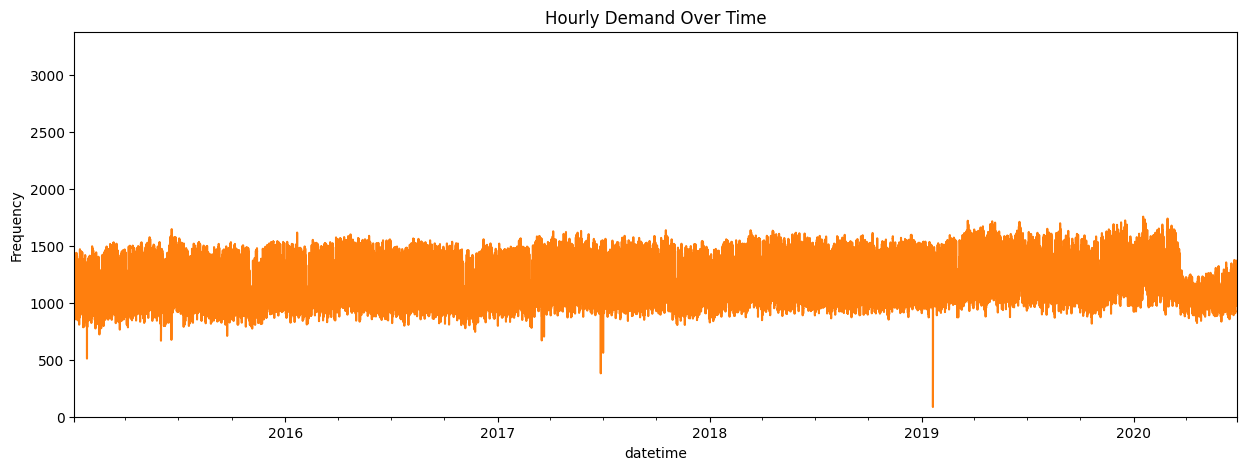

In [ ]:
# Demand over time
continuous_df['nat_demand'].plot(figsize=(15, 5), title="Hourly Demand Over Time")

Adding time based features to the dataframe.

<Axes: title={'center': 'Avg Demand by Hour'}, xlabel='hour'>

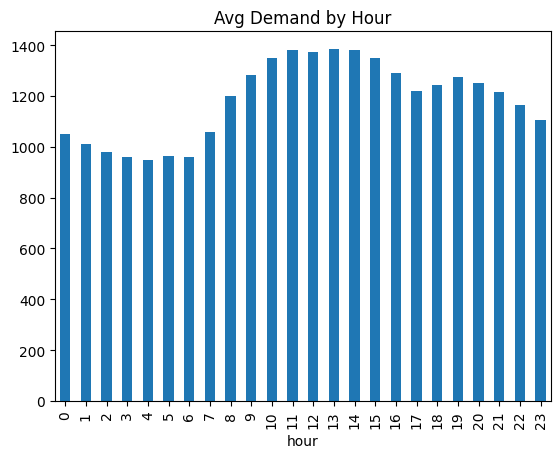

In [13]:
continuous_df['hour'] = continuous_df.index.hour
continuous_df['dayofweek'] = continuous_df.index.dayofweek
continuous_df['month'] = continuous_df.index.month
continuous_df['year'] = continuous_df.index.year

# Plot average demand by hour
continuous_df.groupby('hour')['nat_demand'].mean().plot(kind='bar', title="Avg Demand by Hour")


In [4]:
import pandas as pd
from src.data_prep.feature_engineering import FeatureEngineer

# Ensure 'datetime' is the index and in datetime format
df = pd.read_csv("datasets/continuous dataset.csv", parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Apply feature engineering
engineered_df = (
    FeatureEngineer(df)
    .add_time_features()
    .add_lag_features()
    .add_rolling_features()
    .finalize()
)

In [25]:
engineered_df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,weekend,nat_demand_lag_1,nat_demand_lag_24,nat_demand_lag_168,nat_demand_rollmean_3,nat_demand_rollstd_3,nat_demand_rollmean_24,nat_demand_rollstd_24,nat_demand_rollmean_168,nat_demand_rollstd_168
count,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,...,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000,47880.000000
mean,1183.187317,27.400464,0.018315,0.080203,13.349231,26.924994,0.017846,0.106561,7.024528,24.722584,...,0.285714,1183.185979,1183.135501,1183.084442,1183.184926,44.783182,1183.165279,166.424913,1183.114983,181.407877
std,192.076742,1.674559,0.001609,0.065591,7.270045,3.018298,0.001891,0.086293,4.088421,2.414794,...,0.451759,192.078146,192.113081,192.229127,186.475246,34.298796,92.157067,44.075568,61.418429,21.053385
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,...,0.000000,85.192500,85.192500,85.192500,161.524800,0.066133,882.883329,41.920252,999.776110,77.001784
25%,1020.268675,26.163004,0.017239,0.026722,7.534083,24.772897,0.016583,0.037109,3.950007,22.958337,...,0.000000,1020.268675,1020.212175,1020.073175,1027.095992,20.364972,1123.190279,129.032630,1145.284314,177.993218
50%,1168.917600,27.119287,0.018596,0.065475,12.148026,26.169946,0.018358,0.086304,5.974612,24.003915,...,0.000000,1168.917600,1168.832450,1168.758350,1168.224550,35.958286,1192.930031,183.879507,1184.742573,185.073184
75%,1327.763275,28.557497,0.019524,0.117462,18.596036,28.712335,0.019243,0.157593,9.367971,26.245493,...,1.000000,1327.763275,1327.763275,1328.077675,1323.620150,58.481635,1246.892634,200.497151,1220.452890,191.777133
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,...,1.000000,1754.882000,1754.882000,1754.882000,1740.536100,624.928358,1484.779633,391.679696,1398.651924,241.343515


### Why We Chose Random Forest as the Baseline Model

The Random Forest algorithm was selected as the baseline model for load forecasting based on the following observations and criteria:

1. **Structured Tabular Data**: The dataset consists of timestamped demand data, weather features, lag variables, and categorical indicators (e.g., holiday, school). Random Forests excel on structured tabular datasets without requiring complex transformations.

2. **Non-Linear Relationships**: Load behavior is influenced by non-linear interactions between time, weather, and seasonal variables. Random Forests naturally model such non-linearities without assumptions.

3. **Robustness**: Random Forests are robust to multicollinearity, missing values, and irrelevant features — which is useful when experimenting with many lag and rolling window features.

4. **Minimal Preprocessing**: Unlike LSTM or ARIMA models, Random Forests don't require scaling, stationarity, or differencing of time series.

5. **Fast Training**: As a tree-based model, Random Forests train quickly and serve as an efficient starting point to benchmark future models (like LSTM, XGBoost, etc.).

6. **Interpretability**: Feature importances can be extracted and visualized, providing insights into which variables drive the model's predictions.

#### ✅ Summary:
Random Forests offer a strong baseline in forecasting tasks involving tabular, engineered time series data. They provide quick, interpretable, and high-performing results before transitioning to more complex, sequence-based models like LSTMs.


In [ ]:
from src.models.baseline_model import BaselineModel

# Train & Evaluate model
model = BaselineModel(engineered_df)
X_train, X_test, y_train, y_test = model.train_test_split(test_size=0.2)
model.train(X_train, y_train)
y_test, y_pred = model.evaluate(X_test, y_test)


Evaluation Metrics:
MAE: 18.68
RMSE: 26.01
R²: 0.980


### 📊 Model Evaluation Summary (Baseline Random Forest)

After training a Random Forest model on the engineered features, the following evaluation metrics were obtained on the test set:

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MAE** (Mean Absolute Error) | 18.68 | On average, the model's predictions are off by approximately 18.7 MW. This represents the average size of the error, without considering direction. |
| **RMSE** (Root Mean Squared Error) | 26.01 | The RMSE penalizes larger errors more heavily. The relatively small difference between RMSE and MAE suggests the model does not make many large mistakes. |
| **R²** (Coefficient of Determination) | 0.980 | The model explains 98% of the variance in the actual demand. This indicates a very strong fit and high predictive power for a baseline model. |

#### ✅ Interpretation:
- The model performs **very well** on the test data.
- Errors are **small and consistent**, and the model captures the underlying patterns in the data.
- This makes a strong baseline, and provides a solid foundation for experimenting with more complex models (e.g., LSTM, XGBoost, or hybrid ensembles).

---

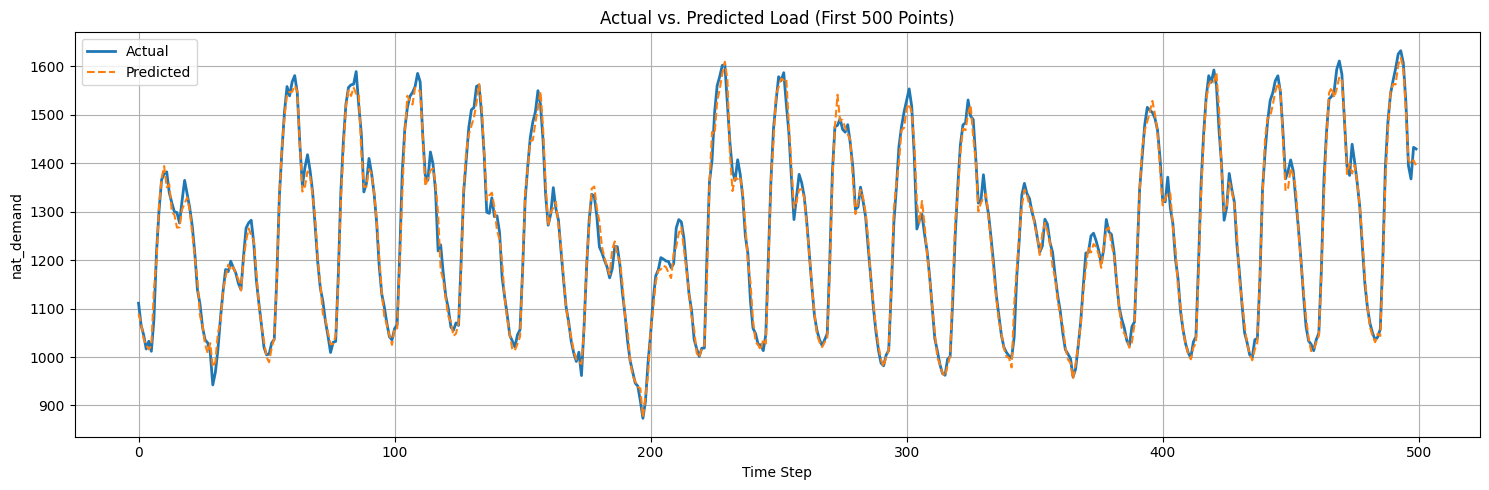

In [13]:
import matplotlib.pyplot as plt

# Plot a subset to make it easier to see patterns
n = 500  # change as needed

plt.figure(figsize=(15, 5))
plt.plot(y_test.values[:n], label="Actual", linewidth=2)
plt.plot(y_pred[:n], label="Predicted", linestyle='--')
plt.title("Actual vs. Predicted Load (First {} Points)".format(n))
plt.xlabel("Time Step")
plt.ylabel("nat_demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Training the model on the provided test_df and then testing the model on the provided test_df

In [ ]:
import pandas as pd

# Excel files
train_sheets = pd.read_excel("datasets/train_dataframes.xlsx", sheet_name=None)  # loads all sheets
test_sheets = pd.read_excel("datasets/test_dataframes.xlsx", sheet_name=None)

# Combine all train sheets
train_df = pd.concat(train_sheets.values(), ignore_index=True)
test_df = pd.concat(test_sheets.values(), ignore_index=True)


In [ ]:
# Parse datetime column
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Set index
train_df.set_index('datetime', inplace=True)
test_df.set_index('datetime', inplace=True)


In [ ]:
# Quick check
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Train head:\n", train_df.head())
print("Test head:\n", test_df.head())

Train shape: (582288, 11)
Test shape: (2352, 11)
Train head:
                      week_X-2  week_X-3  week_X-4      MA_X-4  dayOfWeek  \
datetime                                                                   
2015-01-31 01:00:00  962.2865  906.9580  970.3450  938.004850          1   
2015-01-31 02:00:00  933.3221  863.5135  912.1755  900.284075          1   
2015-01-31 03:00:00  903.9817  848.4447  900.2688  881.704325          1   
2015-01-31 04:00:00  900.9995  839.8821  889.9538  876.458825          1   
2015-01-31 05:00:00  904.3481  847.1073  893.6865  879.190775          1   

                     weekend  holiday  Holiday_ID  hourOfDay    T2M_toc  \
datetime                                                                  
2015-01-31 01:00:00        1        0           0          1  25.308496   
2015-01-31 02:00:00        1        0           0          2  25.141443   
2015-01-31 03:00:00        1        0           0          3  25.006738   
2015-01-31 04:00:00        1  

In [20]:
from src.models.baseline_model import BaselineModel

# Ensure train/test DataFrames are aligned and clean
X_train = train_df.drop(columns=["DEMAND"])
y_train = train_df["DEMAND"]

X_test = test_df.drop(columns=["DEMAND"])
y_test = test_df["DEMAND"]

# Train and evaluate
model = BaselineModel(df=train_df, target="DEMAND")
model.train(X_train, y_train)
y_test_actual, y_predicted = model.evaluate(X_test, y_test)


Evaluation Metrics:
MAE: 5.87
RMSE: 18.21
R²: 0.991


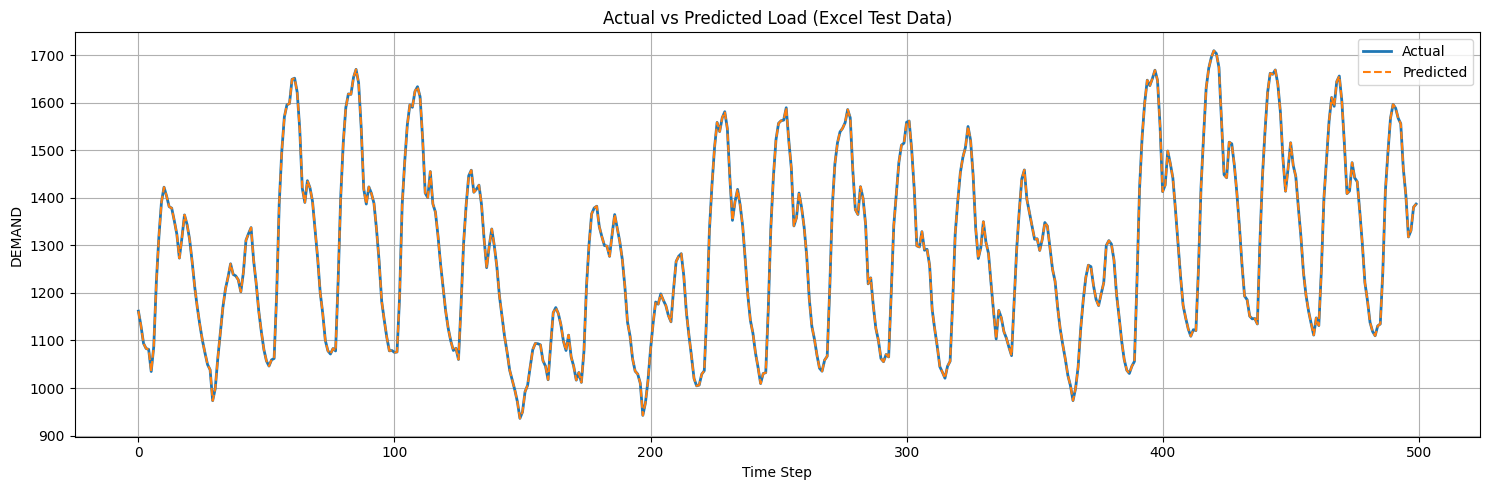

In [21]:
import matplotlib.pyplot as plt

n = 500  # adjust for zoom level

plt.figure(figsize=(15, 5))
plt.plot(y_test_actual.values[:n], label="Actual", linewidth=2)
plt.plot(y_predicted[:n], label="Predicted", linestyle='--')
plt.title("Actual vs Predicted Load (Excel Test Data)")
plt.xlabel("Time Step")
plt.ylabel("DEMAND")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Model Evaluation – Excel-Based Train/Test Split

After training the Random Forest model using the structured weekly `train_ddataframes.xlsx` and `test_dataframes.xlsx`, we obtained the following evaluation metrics:

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MAE (Mean Absolute Error)** | **5.87** | On average, the model's predictions deviate from the actual demand by just **5.9 MW**, indicating high prediction accuracy. |
| **RMSE (Root Mean Squared Error)** | **18.21** | The RMSE, which penalizes larger errors, is also low, confirming that the model rarely makes large mistakes. |
| **R² (R-squared / Coefficient of Determination)** | **0.991** | The model explains **99.1%** of the variance in demand values, reflecting a near-perfect fit to the test data. |

#### Observations:
- This version of the model significantly outperforms the earlier time-split version (which had MAE ≈ 18.7 and R² ≈ 0.98).
- The Excel-based weekly splits may better reflect real-world time groupings (e.g., seasonal patterns, weekly behavior), making this model more generalizable and robust.
- Given the low errors and high R², the model is **well-suited for deployment** and **does not require additional ML complexity** like LSTM or XGBoost at this stage.

---



### Saving the model for future use.

Why joblib over pickle?
- joblib is optimized for numpy-heavy objects, like scikit-learn models.

- Faster and more efficient when serializing models with lots of arrays (e.g., tree structures, coefficients).

In [24]:
import joblib
import os

# Create models directory if not exists
os.makedirs("models", exist_ok=True)

# Save the trained model
joblib.dump(model.model, "models/random_forest_load_forecaster.pkl")

['models/random_forest_load_forecaster.pkl']